# Bivariate Linear Bayesian Model Mixing with SAMBA toy models

This notebook shows how to use the Bayesian model mixing package **Taweret** for a toy problem. 

Author : Dan Liyanage 

Date : 11/10/2022

More about SAMBA toy models can be found in [Uncertainties here, there, and everywhere: interpolating between small- and large-g expansions using Bayesian Model Mixing](https://arxiv.org/abs/2206.04116)



## Steps for Bayesian Model Mixing with Taweret
    1. Define your models using BayesModel class in `Taweret.core.bayesmodel` (Only if you want to bring in your own models)
    2. Choose a Mixing method (Avilable mixing methods can be found in Taweret/mix)
    3. Find the posterior for the mixture weights (parameters in the mixture function) and/or model parameters by training the mixed model. 
    4. Make predictions! 

In [24]:
import sys

# You will have to change the following imports depending on where you have 
# the packages installed
sys.path.append("/Users/dananjayaliyanage/git/Taweret")
sys.path.append("/Users/dananjayaliyanage/git/SAMBA")

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
# To define priors. (uncoment if not using default priors)
#import bilby

# For other operations
import numpy as np

### 1. Get toymodels and the psuedo-experimental data

In [25]:
# Toy models from SAMBA
from Taweret.models import samba_models as toy_models

m1 = toy_models.loworder(2, 'uninformative')
m2 = toy_models.highorder(2, 'uninformative')
truth = toy_models.true_model()
exp = toy_models.exp_data()

In [26]:
g = np.linspace(0.1, 0.6, 10)
plot_g = np.linspace(0.01,1,100)
m1_prediction = m1.evaluate(plot_g)
m2_prediction = m2.evaluate(plot_g)
true_output = truth.evaluate(plot_g)
exp_data= exp.evaluate(g,error = 0.01)

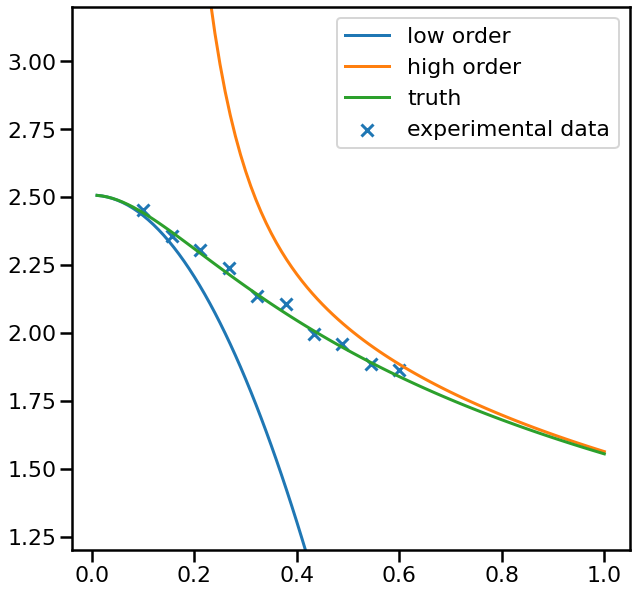

In [27]:

fig, ax_f = plt.subplots(figsize=(10,10))
ax_f.plot(plot_g, m1_prediction[0].flatten(), label='low order')
ax_f.plot(plot_g, m2_prediction[0].flatten(), label='high order')
ax_f.plot(plot_g, true_output[0], label='truth')
ax_f.scatter(g,exp_data[0], marker='x', label='experimental data')
ax_f.set_ylim(1.2,3.2)
ax_f.legend()

###  2. Choose a Mixing method

In [28]:
# Mixing method
from Taweret.mix.bivariate_linear import BivariateLinear as BL

models= {'low_order':m1,'high_order':m2}
mix_model = BL(models_dic=models, method='step')

step bivariate linear mixing method has 1 free parameter(s)
Default prior is set to {'step_0': Uniform(minimum=0, maximum=1, name='step_0', latex_label='step_0', unit=None, boundary=None)}
To change the prior use `set_prior` method


In [29]:
#uncoment to change the prior from the default
#priors = bilby.core.prior.PriorDict()
#priors['step_0'] = bilby.core.prior.Uniform(0, 1, name="step_0")
#mix_model.set_prior(priors)

### 3. Train to find posterior

16:40 bilby INFO    : Running for label 'bivariate_mix', output will be saved to 'outdir'
16:40 bilby INFO    : Search parameters:
16:40 bilby INFO    :   step_0 = Uniform(minimum=0, maximum=1, name='step_0', latex_label='step_0', unit=None, boundary=None)
16:40 bilby INFO    : Single likelihood evaluation took 6.069e-04 s
16:40 bilby WARNING : Supplied argument 'npool' not an argument of 'Ptemcee', removing.
16:40 bilby WARNING : Supplied argument 'nburn' not an argument of 'Ptemcee', removing.
16:40 bilby INFO    : Using sampler Ptemcee with kwargs {'ntemps': 10, 'nwalkers': 20, 'Tmax': 100, 'betas': None, 'a': 2.0, 'adaptation_lag': 10000, 'adaptation_time': 100, 'random': None, 'adapt': False, 'swap_ratios': False}
16:40 bilby INFO    : Using convergence inputs: ConvergenceInputs(autocorr_c=5, autocorr_tol=50, autocorr_tau=1, gradient_tau=0.1, gradient_mean_log_posterior=0.1, Q_tol=1.02, safety=1, burn_in_nact=50, burn_in_fixed_discard=0, mean_logl_frac=0.01, thin_by_nact=0.5, nsam

The following Default settings for sampler will be used. You can changethese arguments by providing kwargs_for_sampler argement in `train`.Check Bilby documentation for other sampling options.
{'sampler': 'ptemcee', 'ntemps': 10, 'nwalkers': 20, 'Tmax': 100, 'nburn': 200, 'nsamples': 3000, 'threads': 5}


16:40 bilby INFO    : Generating pos0 samples
16:40 bilby INFO    : Starting to sample


1|0:00:00|nc:1.0e+03|a0:0.20-1.00|swp:0.77-0.97|n:nan<3000|t!nan(+nan,+nan)|q:inf|0.23ms/ev
2|0:00:00|nc:2.0e+03|a0:0.40-1.00|swp:0.80-0.98|n:nan<3000|t!nan(+nan,+nan)|q:inf|0.22ms/ev
3|0:00:00|nc:3.0e+03|a0:0.47-0.93|swp:0.80-0.98|n:nan<3000|t!nan(+nan,+nan)|q:inf|0.22ms/ev
4|0:00:00|nc:4.0e+03|a0:0.50-0.95|swp:0.80-0.98|n:nan<3000|t!nan(+nan,+nan)|q:inf|0.22ms/ev
5|0:00:01|nc:5.0e+03|a0:0.52-0.92|swp:0.80-0.98|n:nan<3000|t!nan(+nan,+nan)|q:inf|0.21ms/ev
6|0:00:01|nc:6.0e+03|a0:0.50-0.93|swp:0.80-0.98|n:nan<3000|t!nan(+nan,+nan)|q:inf|0.21ms/ev
7|0:00:01|nc:7.0e+03|a0:0.54-0.91|swp:0.80-0.97|n:nan<3000|t!nan(+nan,+nan)|q:inf|0.22ms/ev
8|0:00:01|nc:8.0e+03|a0:0.57-0.90|swp:0.80-0.97|n:nan<3000|t!nan(+nan,+nan)|q:inf|0.22ms/ev
9|0:00:01|nc:9.0e+03|a0:0.58-0.89|swp:0.80-0.97|n:nan<3000|t!nan(+nan,+nan)|q:inf|0.22ms/ev
10|0:00:02|nc:1.0e+04|a0:0.54-0.90|swp:0.80-0.98|n:nan<3000|t!nan(+nan,+nan)|q:inf|0.22ms/ev
11|0:00:02|nc:1.1e+04|a0:0.56-0.87|swp:0.80-0.98|n:nan<3000|t!nan(+nan,+nan)|q:

16:44 bilby INFO    : Finished sampling
16:44 bilby INFO    : Writing checkpoint and diagnostics
16:44 bilby INFO    : Finished writing checkpoint
16:44 bilby INFO    : Walkers plot failed with exception 'AxesSubplot' object is not iterable
16:44 bilby INFO    : Sampling time: 0:03:52.973020
16:44 bilby INFO    : Summary of results:
nsamples: 3020
ln_noise_evidence:    nan
ln_evidence:  4.026 +/-  0.167
ln_bayes_factor:    nan +/-  0.167



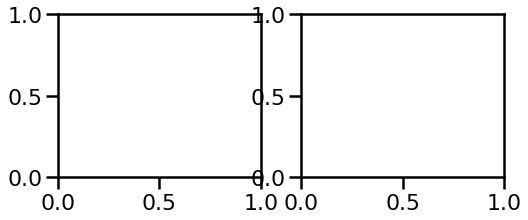

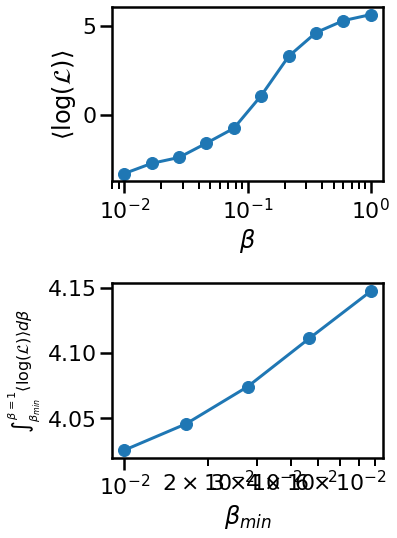

In [30]:
result = mix_model.train(x_exp=g, y_exp=exp_data[0], y_err=exp_data[1])

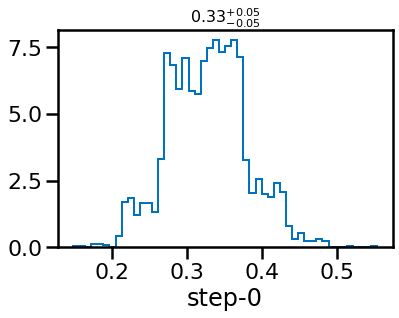

In [31]:
# Posterior of the mixing parameters. 
result.plot_corner()

### 4. Predictions

In [32]:
_,mean_prior,CI_prior, _ = mix_model.prior_predict(plot_g, CI=[5,20,80,95])
_,mean,CI, _ = mix_model.predict(plot_g, CI=[5,20,80,95])

(10000, 1)
using provided samples instead of posterior


In [33]:
per5, per20, per80, per95 = CI
prior5, prior20, prior80, prior95 = CI_prior

In [34]:
# Map value prediction for the step mixing function parameter
map_prediction = mix_model.evaluate(mix_model.map, plot_g)

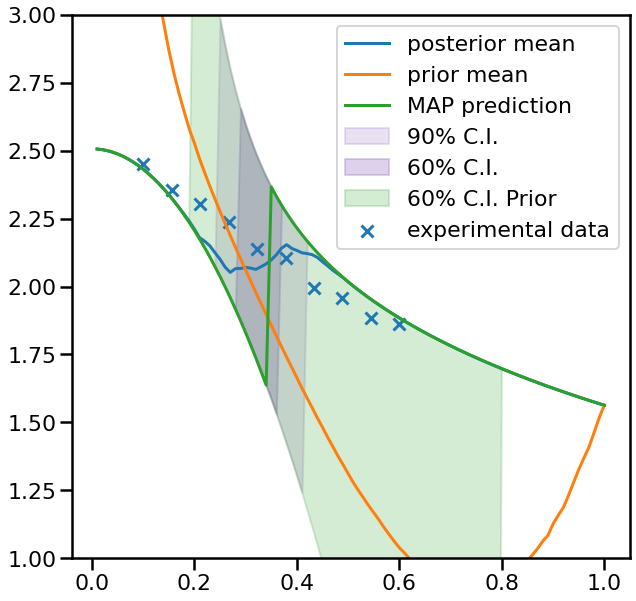

In [35]:
%matplotlib inline
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(plot_g, mean, label='posterior mean')
ax.fill_between(plot_g,per5,per95,color=sns.color_palette()[4], alpha=0.2, label='90% C.I.')
ax.fill_between(plot_g,per20,per80, color=sns.color_palette()[4], alpha=0.3, label='60% C.I.')
ax.fill_between(plot_g,prior20,prior80,color=sns.color_palette()[2], alpha=0.2, label='60% C.I. Prior')
ax.scatter(g,exp_data[0], marker='x', label='experimental data')
ax.plot(plot_g, mean_prior, label='prior mean')
ax.plot(plot_g, map_prediction.flatten(), label='MAP prediction')
ax.set_ybound(1,3)
ax.legend()